Analysis Log Files generated by Process Controller

Format example: `['2022-06-13 08:42:01,347', 'app', 'INFO', 'App Started\n']`

In [11]:
from process_controller_logs.functions import *

from datetime import datetime

log_lines = []
file_path = r"C:\Users\leungp\Documents\GitHub\integral_timber_joints\external\itj_design_study\220407_CantiBoxMid\execution_log\ProcessExeController.2022-06-13.debug.log"
log_lines += load_log(file_path)
file_path = r"C:\Users\leungp\Documents\GitHub\integral_timber_joints\external\itj_design_study\220407_CantiBoxMid\execution_log\ProcessExeController.2022-06-14.debug.log"
log_lines += load_log(file_path)

num_lines = len(log_lines)
print(f"Total Number of lines read from log file: {num_lines}")  # print number of lines


valid_lines = filter_valid_log_lines(log_lines)
num_valid_lines = len(valid_lines)  # get the number of lines read
print(f"Number of valid lines read from log file: {num_valid_lines}")  # print number of lines

json_path = r"C:\Users\leungp\Documents\GitHub\integral_timber_joints\external\itj_design_study\220407_CantiBoxMid\CantiBoxMid_process.json"
process = load_process(json_path)

Number of lines read from log file: 41362
Number of lines read from log file: 84448
Total Number of lines read from log file: 125810
Number of valid lines read from log file: 125810
Process Loaded (28 Beams, 228 Actions, 1119 Movements)


Parse Date into `datetime` object

In [12]:
import re

# Search for lines with a Movement ID
pattern = r"\(A\d+_M\d+\)"  # regular expression pattern to match (A1_M0)
for time, app, scope, message in valid_list:
    result = re.search(pattern, message)
    if result is not None:
        print (result, message) 


<re.Match object; span=(129, 136), match='(A0_M1)'> Executing Linear Move to Frame(Point(23479.276, 3236.560, 1021.685), Vector(0.000, 1.000, -0.000), Vector(1.000, -0.000, 0.001)) (A0_M1): Linear Advance to Storage Frame of PG1500 ('g3'), to get tool.

<re.Match object; span=(9, 16), match='(A0_M1)'> Movement (A0_M1) start to end distance 35.04201354907527 mm

<re.Match object; span=(9, 16), match='(A0_M1)'> Movement (A0_M1) total time 2.942677 s

<re.Match object; span=(22, 29), match='(A0_M2)'> Executing IO LockTool (A0_M2): Toolchanger Lock PG1500 ('g3')

<re.Match object; span=(23, 30), match='(A0_M2)'> DigitalOutput LockTool (A0_M2) for tool g3 Success. Tool is locked. Probe is touched.

<re.Match object; span=(129, 136), match='(A0_M3)'> Executing Linear Move to Frame(Point(23479.047, 3236.618, 1271.684), Vector(0.000, 1.000, -0.000), Vector(1.000, -0.000, 0.001)) (A0_M3): Linear Retract after getting PG1500 ('g3') from storage.

<re.Match object; span=(9, 16), match='(A0_M3)'> 

Filter the line that says total execution time.

In [13]:
# Search for lines with a Movement ID and total time.
from datetime import timedelta

pattern = r"\((A\d+_M\d+)\).* total time (.*) s"  # regular expression pattern to match (A1_M0) and the time

movement_time = []
total_duration_s = timedelta()
for time, app, scope, message in valid_list:
    result = re.search(pattern, message)
    if result is not None:
        print (message) 
        m_id = result.group(1)
        duration_s = float(result.group(2))
        movement_time.append([m_id, duration_s])
        total_duration_s += timedelta(seconds = duration_s)

print(f"Total Duration = {total_duration_s} s")

Movement (A0_M1) total time 2.942677 s

Movement (A0_M3) total time 13.797212 s

Movement (A2_M0) total time 79.850316 s

Movement (A2_M2) total time 3.566875 s

Movement (A2_M5) total time 4.350523 s

Movement (A3_M0) total time 75.88774 s

Movement (A3_M0) total time 83.982286 s

Movement (A3_M1) total time 5.413193 s

Movement (A3_M4) total time 4.028286 s

Movement (A4_M2) total time 0.93077 s

Movement (A6_M0) total time 74.942047 s

Movement (A6_M2) total time 3.646822 s

Movement (A6_M5) total time 4.30686 s

Movement (A7_M0) total time 71.249989 s

Movement (A7_M1) total time 145.32682 s

Movement (A7_M4) total time 3.941236 s

Movement (A8_M2) total time 0.941134 s

Movement (A10_M1) total time 143.717069 s

Movement (A10_M2) total time 13.676219 s

Movement (A10_M4) total time 2.666774 s

Movement (A11_M0) total time 37.624181 s

Movement (A11_M1) total time 3.237233 s

Movement (A11_M5) total time 2.762654 s

Movement (A11_M6) total time 5.010012 s

Movement (A12_M0) total t

In [14]:
len(movement_time)

581

In [15]:
class_counts = {}
for obj in process.movements:
    class_name = obj.__class__.__name__  # get the name of the object's class
    if class_name in class_counts:
        class_counts[class_name] += 1  # if class_name is already in class_counts, increment the count
    else:
        class_counts[class_name] = 1  # if class_name is not in class_counts, add it with count 1

print(class_counts)  # print the dictionary of class counts

{'RoboticFreeMovement': 156, 'RoboticLinearMovement': 400, 'RoboticDigitalOutput': 248, 'OperatorLoadBeamMovement': 28, 'SetWorkpieceWeight': 50, 'CancelRobotOffset': 94, 'ClampsJawMovement': 45, 'AcquireDockingOffset': 56, 'RoboticClampSyncLinearMovement': 14, 'OperatorAttachToolMovement': 8, 'RobotScrewdriverSyncLinearMovement': 16, 'ScrewdriverMovement': 4}


In [16]:
movement = process.get_movement_by_movement_id("A0_M0")
print(movement)
print(movement.__class__.__name__)

Free Move to Frame(Point(23479.244, 3236.568, 1056.685), Vector(0.000, 1.000, -0.000), Vector(1.000, -0.000, 0.001))
RoboticFreeMovement


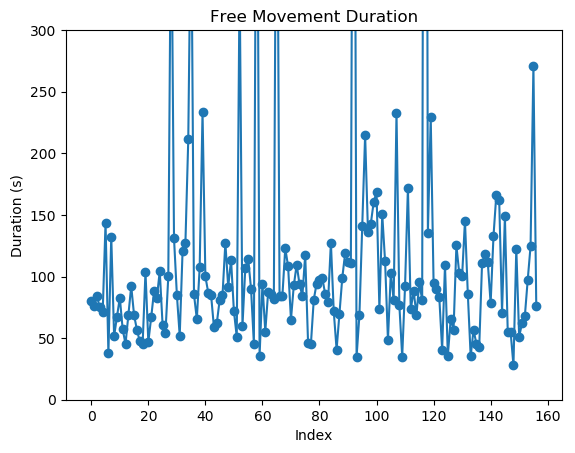

40.7142462 240.87914059999957
Mean Value discarding top bottom 5% = 95.12247971631204


In [17]:
import matplotlib.pyplot as plt

entries = movement_time

x = []  # create list of indices for x-axis
y = []  # create list of duration_s for y-axis
index = 0

for m_id, duration_s in movement_time:
    movement = process.get_movement_by_movement_id(m_id) 
    if movement.__class__.__name__ == "RoboticFreeMovement":
        x.append(index)
        index +=1
        y.append(duration_s)

plt.plot(x, y)  # plot the values of duration_s
plt.scatter(x, y)  # display the data points as dots
plt.xlabel('Index')  # add label for x-axis
plt.ylabel('Duration (s)')  # add label for y-axis
plt.title('Free Movement Duration')  # add title for the plot
plt.ylim(0, 300)  # set the y-axis limits

plt.show()  # show the plot

mean = mean_percentile(y,5,95)
print (f"Mean Value discarding top bottom 5% = {mean}")

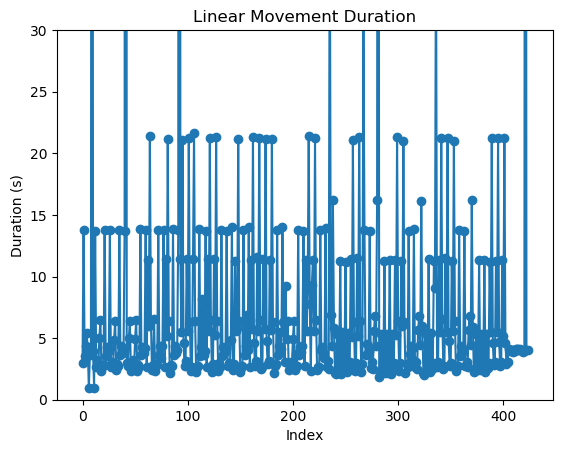

2.2791023999999998 21.2278539
Mean Value discarding top bottom 5% = 6.035839321052632


In [18]:
import matplotlib.pyplot as plt

entries = movement_time

x = []  # create list of indices for x-axis
y = []  # create list of duration_s for y-axis
index = 0

for m_id, duration_s in movement_time:
    movement = process.get_movement_by_movement_id(m_id) 
    if movement.__class__.__name__ == "RoboticLinearMovement":
        x.append(index)
        index +=1
        y.append(duration_s)

plt.plot(x, y)  # plot the values of duration_s
plt.scatter(x, y)  # display the data points as dots
plt.xlabel('Index')  # add label for x-axis
plt.ylabel('Duration (s)')  # add label for y-axis
plt.title('Linear Movement Duration')  # add title for the plot
plt.ylim(0, 30)  # set the y-axis limits

plt.show()  # show the plot

mean = mean_percentile(y,5,95)
print (f"Mean Value discarding top bottom 5% = {mean}")